#This submission belongs to Abhigyan 1CR19CS004
Question: Build a Random Forest Classifier and KNN to classify the CIFAR-10 images or any
suitable image dataset.


In [1]:
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import cv2
from sklearn import metrics

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 5s 0us/step


In [3]:
x_train.shape,x_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [4]:
# Normalization
x_train = x_train/255.0
x_test = x_test/255.0

In [5]:
nsamples, nx, ny, nrgb = x_train.shape
x_train2 = x_train.reshape((nsamples,nx*ny*nrgb))
x_train2

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

In [6]:
nsamples, nx, ny, nrgb = x_test.shape
x_test2 = x_test.reshape((nsamples,nx*ny*nrgb))
x_test2

array([[0.61960784, 0.43921569, 0.19215686, ..., 0.08235294, 0.2627451 ,
        0.43137255],
       [0.92156863, 0.92156863, 0.92156863, ..., 0.72941176, 0.78431373,
        0.78039216],
       [0.61960784, 0.74509804, 0.87058824, ..., 0.02745098, 0.03137255,
        0.02745098],
       ...,
       [0.07843137, 0.05882353, 0.04705882, ..., 0.09803922, 0.07843137,
        0.18431373],
       [0.09803922, 0.15686275, 0.04705882, ..., 0.36078431, 0.47058824,
        0.31372549],
       [0.28627451, 0.30588235, 0.29411765, ..., 0.10588235, 0.10196078,
        0.10196078]])

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

#Random Forest 
A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [9]:
model=RandomForestClassifier()

In [11]:
model.fit(x_train2,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [12]:
y_pred=model.predict(x_test2)
y_pred

array([2, 8, 8, ..., 5, 5, 7], dtype=uint8)

In [13]:
accuracy_score(y_pred,y_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.58      0.55      0.56      1058
           1       0.54      0.50      0.52      1073
           2       0.31      0.36      0.33       872
           3       0.26      0.33      0.29       786
           4       0.38      0.38      0.38       985
           5       0.41      0.43      0.42       947
           6       0.56      0.46      0.50      1214
           7       0.45      0.49      0.47       902
           8       0.62      0.61      0.61      1007
           9       0.56      0.48      0.51      1156

    accuracy                           0.46     10000
   macro avg       0.46      0.46      0.46     10000
weighted avg       0.48      0.46      0.47     10000



In [14]:
cm1 =confusion_matrix(y_pred,y_test)

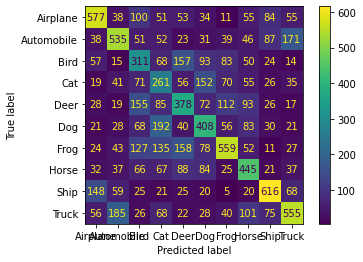

In [15]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm1, display_labels =["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"])
cm_display.plot()
plt.show()

#K Nearest Neighbours

In [16]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
knn = KNeighborsClassifier(n_neighbors=7)

In [18]:
knn.fit(x_train2,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=7)

In [19]:
y_pred_knn = knn.predict(x_test2)
y_pred_knn

array([2, 8, 8, ..., 5, 6, 4], dtype=uint8)

In [20]:
accuracy_score(y_pred_knn,y_test)
print(classification_report(y_pred_knn,y_test))

              precision    recall  f1-score   support

           0       0.52      0.40      0.45      1299
           1       0.20      0.70      0.30       280
           2       0.44      0.22      0.29      2013
           3       0.20      0.28      0.23       707
           4       0.52      0.23      0.32      2222
           5       0.20      0.40      0.27       504
           6       0.27      0.35      0.30       761
           7       0.20      0.70      0.31       281
           8       0.69      0.39      0.50      1749
           9       0.14      0.73      0.23       184

    accuracy                           0.34     10000
   macro avg       0.34      0.44      0.32     10000
weighted avg       0.45      0.34      0.35     10000



In [21]:
cm2 = confusion_matrix(y_pred_knn,y_test)


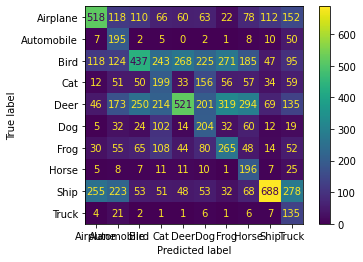

In [22]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm2, display_labels =["Airplane","Automobile","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"])
cm_display.plot()
plt.show()